# Train pre-trained ADAGE models on Staph epi data

### Georgia Doing 2022

This notebook walks through traineding pre-trained models on S. epi data
The main objectives are to validate the training workflow using
1. Loss and validation loss curves
2. Node weight distributions
3. Node KEGG and GO enrichments

In [2]:
import run_model_preT
import run_model
import run_model_lstm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv
from AdageHyperModel import AdageHyperModel
import tensorflow as tf
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [10]:
# for dev purposes, while updating run_model.py need to reload
# for dev purposes, while updating run_model.py need to reload
reload(run_model_preT)
reload(run_model_lstm)
#reload(run_model)
#reload(Adage)

<module 'run_model_lstm' from '/Users/doingg/Dropbox (JAX)/Github/seqADAGE/Py/run_model_lstm.py'>

## Base features (from ADAGE)

For the sake of this efficiency, starting with the following parameters:

* hidden features: 300
* epochs: 500
* curruption: 0.01
* batchs zie: 10
* validatoin split: 0.1
* activation: sigmoid
* objective: binary cross-entropy



In [ ]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
all_comp = np.loadtxt(open('../data_files/se_pandb1282_epi_comp_log_counts_norm_01_nonames.csv', "rb"),delimiter=',',skiprows = 1)
gene_num = np.size(all_comp, 0)
samp_num = np.size(all_comp, 1)
print(gene_num, samp_num)
fig = sns.histplot(all_comp.flatten(), bins = 50)

In [11]:
seq_temp, seq_temp2 = run_model_lstm.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               '../data_files/se_se16_epi_comp_log_counts_norm_01.csv',
                                               960, enc_dim = 10, kl1=0, act = 'tanh', 
                                               tied = True, epochs=3, init='glorot_normal')

updated22
Epoch 1/3
22/22 [==============================] - 15s 626ms/step - loss: 6.1953 - val_loss: 6.1989
Epoch 2/3
22/22 [==============================] - 13s 610ms/step - loss: 6.1953 - val_loss: 6.1989
Epoch 3/3
22/22 [==============================] - 14s 615ms/step - loss: 6.1953 - val_loss: 6.1989
(6,)


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: shapes (239,2266) and (1,40) not aligned: 2266 (dim 1) != 1 (dim 0)

In [4]:
tune_params0, hist0 = run_model_preT.tune_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01_nonames.csv',960)
tune_params1, hist1 = run_model_preT.tune_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01_nonames.csv',961)
tune_params2, hist2 = run_model_preT.tune_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01_nonames.csv',962)
tune_params3, hist3 = run_model_preT.tune_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01_nonames.csv',963)
tune_params4, hist4 = run_model_preT.tune_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01_nonames.csv',964)

Trial 90 Complete [00h 00m 04s]
val_loss: 18539.15234375

Best val_loss So Far: 0.5869221687316895
Total elapsed time: 00h 01m 39s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in hyperband_search_dir/adage_tuner
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0050 summary
Hyperparameters:
units: 90
act1: sigmoid
shuffle: True
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.0
lr: 0.07100000000000001
bs: 30
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Score: 0.5869221687316895

Trial 0046 summary
Hyperparameters:
units: 90
act1: sigmoid
shuffle: True
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.0
lr: 0.07100000000000001
bs: 30
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
Score: 0.6768885850906372

Trial 0034 summary
Hyperparameters:
units: 90
act1: sigmoid
shuffle: True
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.0
lr: 0.07100000000000001
bs: 30
tuner/

In [5]:
#print(len(hist.history['loss']))

#hist0.results_summary()

#hist1.results_summary()
#hist2.results_summary()
#hist3.results_summary()
hist4.results_summary()
#model = tuner.hypermodel.build(best_hps[0])
#hist  = tuner.hypermodel.fit(best_hps[0], model) 



Results summary
Results in hyperband_search_dir/adage_tuner
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0050 summary
Hyperparameters:
units: 90
act1: sigmoid
shuffle: True
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.0
lr: 0.07100000000000001
bs: 30
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0046
Score: 0.5869221687316895

Trial 0046 summary
Hyperparameters:
units: 90
act1: sigmoid
shuffle: True
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.0
lr: 0.07100000000000001
bs: 30
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
Score: 0.6768885850906372

Trial 0034 summary
Hyperparameters:
units: 90
act1: sigmoid
shuffle: True
init: glorot_normal
kl1: 0.0
kl2: 0.0
al2: 0.0
lr: 0.07100000000000001
bs: 30
tuner/epochs: 6
tuner/initial_epoch: 2
tuner/bracket: 3
tuner/round: 1
tuner/trial_id: 0020
Score: 0.6885466575622559

Trial 0020 summary
Hyperparameters:
units: 90
act1: sigm

In [6]:
for p in range(5):
    print(tune_params0[p].values)

for p in range(5):
    print(tune_params1[p].values)

for p in range(5):
    print(tune_params2[p].values)

for p in range(5):
    print(tune_params3[p].values)

for p in range(5):
    print(tune_params4[p].values)
    

{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}
{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 17, 'tuner/initial_epoch': 6, 'tuner/bracket': 3, 'tuner/round': 2, 'tuner/trial_id': '0034'}
{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 6, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0016'}
{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}
{'units': 20, 'act1': 'relu', 'shuffle': False, 'init': 'glorot

In [9]:
#print(tune_params[0].values)
#print(tune_params[1].values)
for i in range(10):
   print(tune_params0[i].values) 
print(tune_params0[89].values)
ahm = AdageHyperModel(gene_num)
model = ahm.build(tune_params[0])
#hist = ahm.fit(tune_params[0],model)
#print(hist)


{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}
{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 17, 'tuner/initial_epoch': 6, 'tuner/bracket': 3, 'tuner/round': 2, 'tuner/trial_id': '0034'}
{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 6, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0016'}
{'units': 30, 'act1': 'relu', 'shuffle': True, 'init': 'glorot_normal', 'kl1': 0.0, 'kl2': 0.0, 'al2': 0.2, 'lr': 0.011, 'bs': 10, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}
{'units': 20, 'act1': 'relu', 'shuffle': False, 'init': 'glorot

NameError: name 'tune_params' is not defined

In [8]:
seq_temp, seq_temp2 = run_model_preT.run_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',
                                               '../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',
                                               960, enc_dim = 300, kl1=0, act = 'tanh', tied = True, epochs=10, init='glorot_normal')
arr_temp, arr_temp2 = run_model_preT.run_model('../data_files/train_set_normalized.csv',
                                               '../data_files/train_set_normalized.csv',
                                               960,enc_dim = 300, kl1=0, act = 'tanh', tied = True, epochs=10, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

updated22
Epoch 1/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 2/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6938 - val_loss: 0.6935
Epoch 3/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6932 - val_loss: 0.6930
Epoch 4/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6928 - val_loss: 0.6926
Epoch 5/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6924 - val_loss: 0.6922
Epoch 6/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 7/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6917 - val_loss: 0.6916
Epoch 8/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6914 - val_loss: 0.6913
Epoch 9/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6912 - val_loss: 0.6910
Epoch 10/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6909 - val_loss: 0.6907

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(2,)
(2,)
(2,)
Epoch 1/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6906 - val_loss: 0.6905
Epoch 2/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6904 - val_loss: 0.6902
Epoch 3/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6900 - val_loss: 0.6899
Epoch 4/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6896 - val_loss: 0.6895
Epoch 5/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6892 - val_loss: 0.6890
Epoch 6/10
16/16 [==============================] - 0s 11ms/step - loss: 0.6888 - val_loss: 0.6886
Epoch 7/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6882 - val_loss: 0.6880
Epoch 8/10
16/16 [==============================] - 0s 13ms/step - loss: 0.6877 - val_loss: 0.6875
Epoch 9/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6871 - val_loss: 0.6868
Epoch 10/10
16/16 [==============================] - 0s 13ms/step - loss: 0.6864 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.5359 - val_loss: 0.5353
Epoch 73/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5336 - val_loss: 0.5330
Epoch 74/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5313 - val_loss: 0.5307
Epoch 75/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5290 - val_loss: 0.5284
Epoch 76/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5268 - val_loss: 0.5262
Epoch 77/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5245 - val_loss: 0.5239
Epoch 78/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5223 - val_loss: 0.5217
Epoch 79/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5201 - val_loss: 0.5195
Epoch 80/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5179 - val_loss: 0.5173
Epoch 81/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5157 - val_loss: 0.5151
Epo

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(2,)
(2,)
(2,)
Epoch 1/10
 1/86 [..............................] - ETA: 11s - loss: 0.6725

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


86/86 [==============================] - 1s 5ms/step - loss: 0.6703 - val_loss: 0.6725
Epoch 2/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6679 - val_loss: 0.6706
Epoch 3/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6656 - val_loss: 0.6688
Epoch 4/10
86/86 [==============================] - 0s 4ms/step - loss: 0.6636 - val_loss: 0.6672
Epoch 5/10
86/86 [==============================] - 0s 5ms/step - loss: 0.6617 - val_loss: 0.6658
Epoch 6/10
86/86 [==============================] - 0s 4ms/step - loss: 0.6599 - val_loss: 0.6646
Epoch 7/10
86/86 [==============================] - 0s 4ms/step - loss: 0.6584 - val_loss: 0.6635
Epoch 8/10
86/86 [==============================] - 0s 4ms/step - loss: 0.6570 - val_loss: 0.6626
Epoch 9/10
86/86 [==============================] - 0s 4ms/step - loss: 0.6558 - val_loss: 0.6618
Epoch 10/10
86/86 [==============================] - 1s 8ms/step - loss: 0.6547 - val_loss: 0.6611
Epoch 1/100
86/86 [===========

86/86 [==============================] - 0s 4ms/step - loss: 0.6386 - val_loss: 0.6502
Epoch 74/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6385 - val_loss: 0.6501
Epoch 75/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6383 - val_loss: 0.6500
Epoch 76/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6382 - val_loss: 0.6499
Epoch 77/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6381 - val_loss: 0.6497
Epoch 78/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6380 - val_loss: 0.6496
Epoch 79/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6379 - val_loss: 0.6495
Epoch 80/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6377 - val_loss: 0.6494
Epoch 81/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6376 - val_loss: 0.6493
Epoch 82/100
86/86 [==============================] - 0s 4ms/step - loss: 0.6375 - val_loss: 0.6492
Epoch 83/100


(5549, 600)

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0]
L2_norm = [0, .4]
act_fun = ['sigmoid','tanh','relu']
tied = [True]

model_dict2 = {
    "tf_adage": tf_adage
}

model_dict_pre = {
    "tf_adage": tf_adage
}

model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L2_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)+ str(seed+571)
                    print(name)
                    mseqpre , mseq = run_model_preT.run_model('../data_files/sepandb1282_MAPPED_sa_NCTC3825_filt_norm_log_01.csv',
                                                              '../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',
                                                              seed=seed+571,
                                                              enc_dim = 50,
                                                              kl2=l, 
                                                              act = a, 
                                                              tied = t, 
                                                              epochs=10, 
                                                              init=i, 
                                                              lr = 0.05)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_pre[name] = mseqpre
                    model_dict_seq2[name] = mseq

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0]
L2_norm = [0, .4]
act_fun = ['sigmoid','tanh','relu']
tied = [True]

model_dictSE = {
    "tf_adage": tf_adage
}

model_dictSA = {
    "tf_adage": tf_adage
}



for seed in range(1):
    for i in inits:
    #print(i)
        for l in L2_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)+ str(seed+571)
                    print(name)
                    mseqSE = run_model.run_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',
                                               seed=seed+571,
                                               enc_dim = 50,
                                               kl2=l, 
                                               act = a, 
                                               tied = t,
                                               epochs=100,
                                               init=i,
                                               lr = 0.05)
                    mseqSA = run_model.run_model('../data_files/sepandb1282_MAPPED_sa_NCTC3825_filt_norm_log_01.csv',
                                               seed=seed+571,
                                               enc_dim = 50,
                                               kl2=l, 
                                               act = a, 
                                               tied = t,
                                               epochs=100,
                                               init=i,
                                               lr = 0.05)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dictSE[name] = mseqSE
                    model_dictSA[name] = mseqSA

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0]
L2_norm = [0, .4]
act_fun = ['sigmoid','tanh','relu']
tied = [True]

model_dict_preCTRL = {
    "tf_adage": tf_adage
}

model_dict_seq2CTRL = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L2_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(seed+571)
                    print(name)
                    mseqpre , mseq = run_model_preT.run_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',
                                                              '../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',
                                                              seed=seed+571,
                                                              enc_dim = 50,
                                                              kl2=l, 
                                                              act = a, 
                                                              tied = t, 
                                                              epochs=10, 
                                                              init=i, 
                                                              lr = 0.05)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_preCTRL[name] = mseqpre
                    model_dict_seq2CTRL[name] = mseq

In [ ]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict_seq2[name]
ax.plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax.set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



In [ ]:
model_dict = model_dict_seq2

yd = len(inits) * len(L2_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L2_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,100)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,100)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

In [ ]:
model_dict = model_dict_seq2CTRL

yd = len(inits) * len(L2_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L2_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[yi].plot(list(range(0,100)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[yi].plot(list(range(0,100)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

In [ ]:
model_dict = model_dict_pre

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

In [ ]:
model_dict = model_dict_preCTRL

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

In [ ]:
model_dict = model_dictSE

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,10)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].plot(list(range(0,10)), model_temp.val_loss, linewidth=1, markersize=2, color = 'red')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1

In [ ]:
model_dict = model_dictSA
model_temp = model_dict['ad_glorot_uniform_0_sigmoid_tiedTrue571']

tf.keras.utils.plot_model(model_temp.autoencoder, show_shapes=True, rankdir="LR")

In [65]:
comp = model_temp.compendium
print(np.transpose(comp).shape)
x_train2, x_train2_noisy = run_model_preT.prep_data(comp, 571)
print(x_train2.shape, x_train2_noisy.shape)
ae = model_temp.autoencoder 
print(ae)
results = ae.evaluate(x_train2_noisy, x_train2)
print(results)
x_t_both = np.concatenate((x_train2_noisy, x_train2))
print(x_t_both.shape)
predictions = ae.predict(x_t_both)
print(predictions.shape)
print(x_train2[0,0])
print(predictions[0,0])
#print("Accuracy", results[1])

(2153, 2766)
(2153, 2766) (2153, 2766)
68/68 [==============================] - 0s 1ms/step - loss: 0.5933
0.593313455581665
(4306, 2766)
135/135 [==============================] - 0s 767us/step
(4306, 2766)
0.0
0.2139921


In [22]:
#explainer = shap.KernelExplainer(ae, x_t_both[:5,:])
#shap_values = explainer.shap_values(x_t_both[0,:], nsamples = 2767)
#shap.force_plot(explainer.expected_value, shap_values[0], x_train2[20,:])

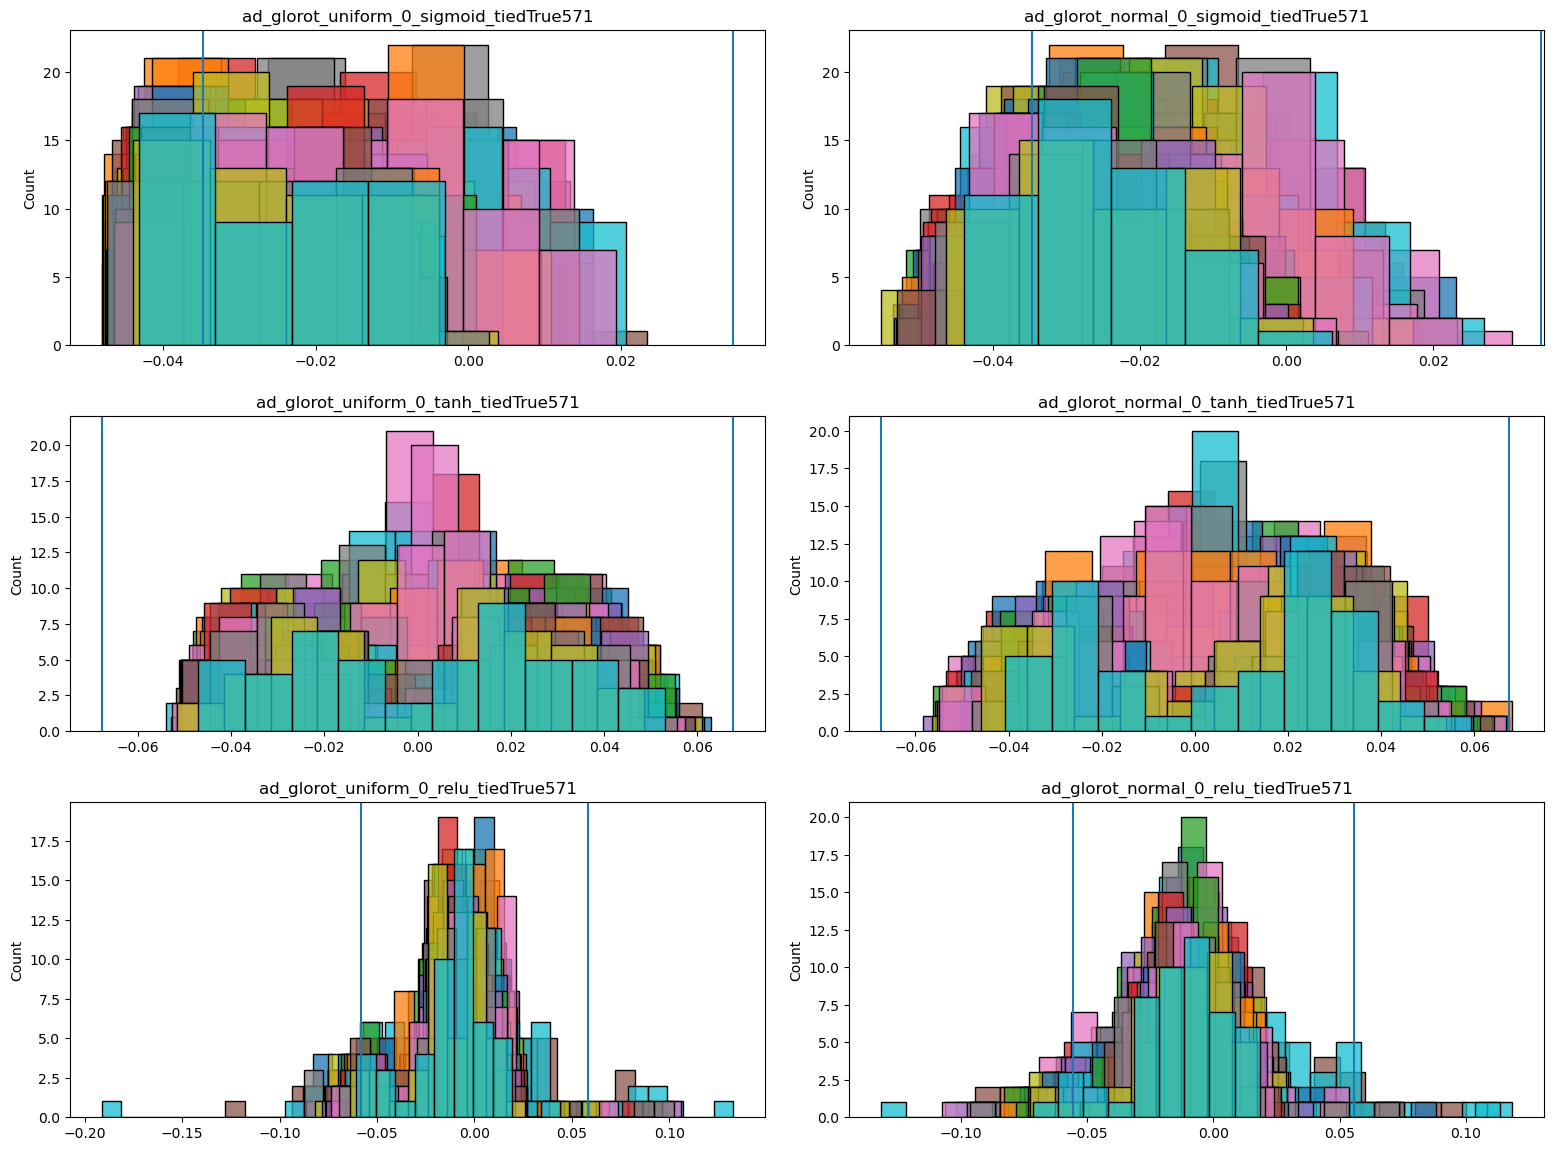

In [18]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


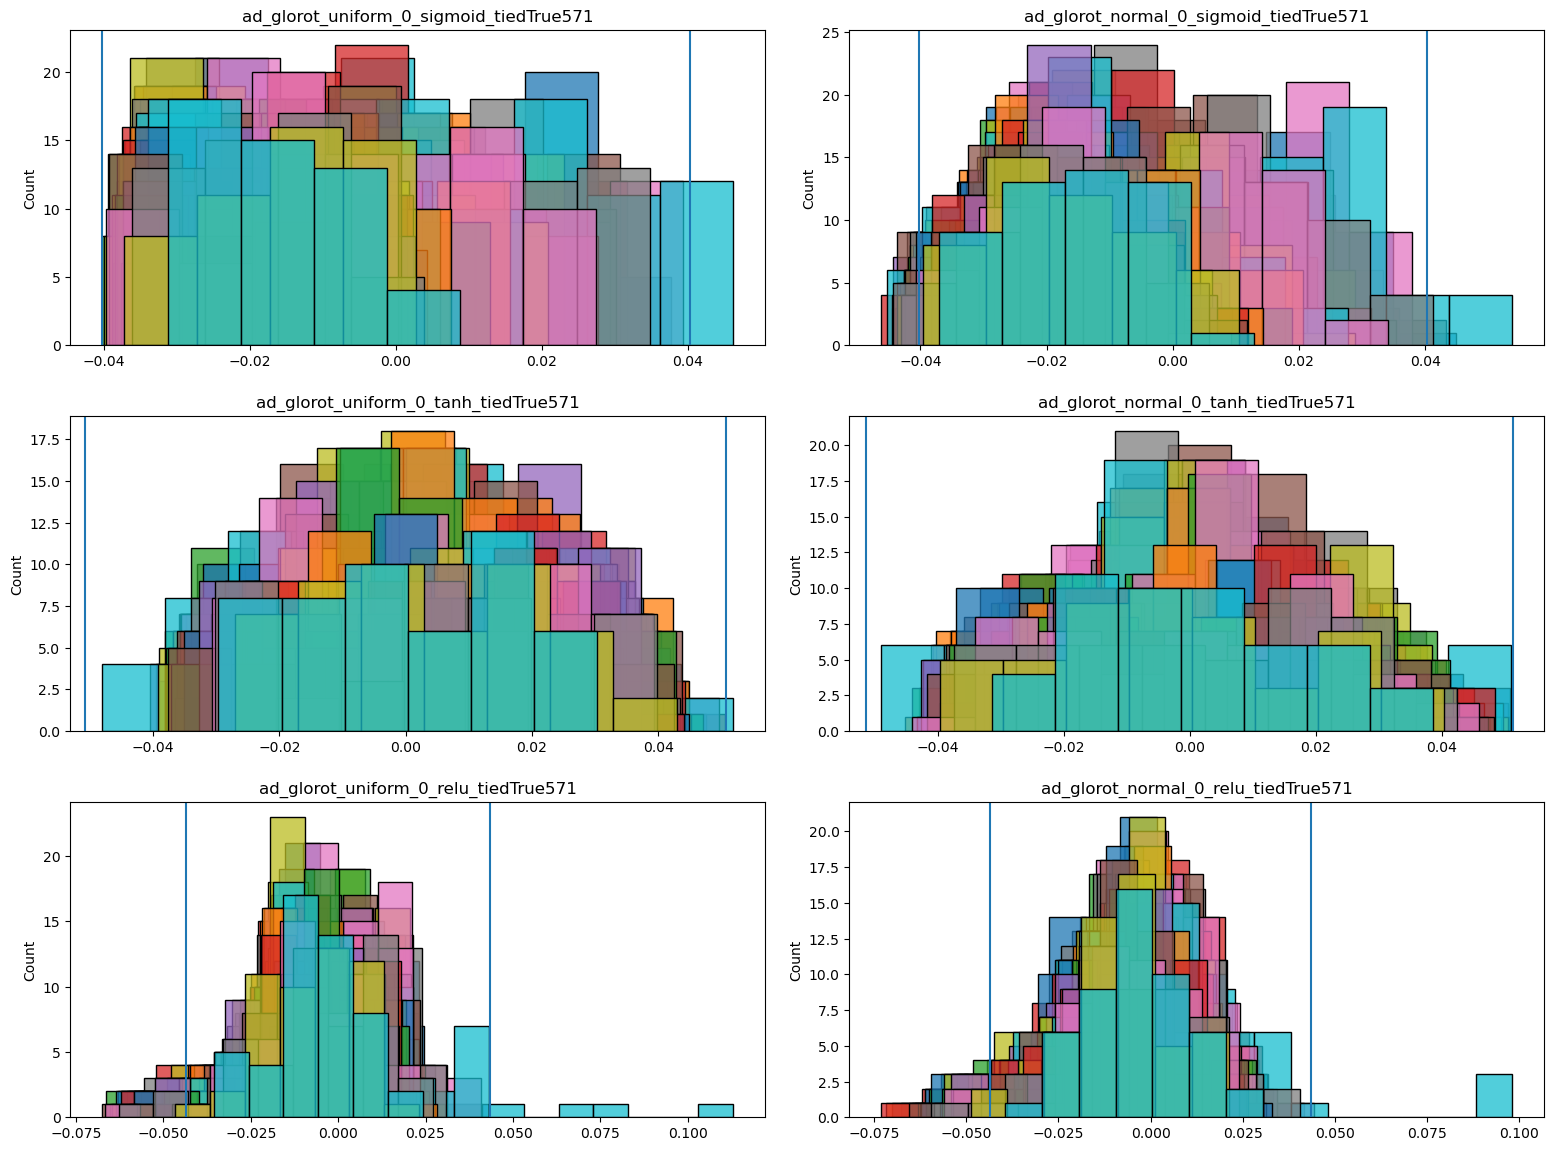

In [19]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2CTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

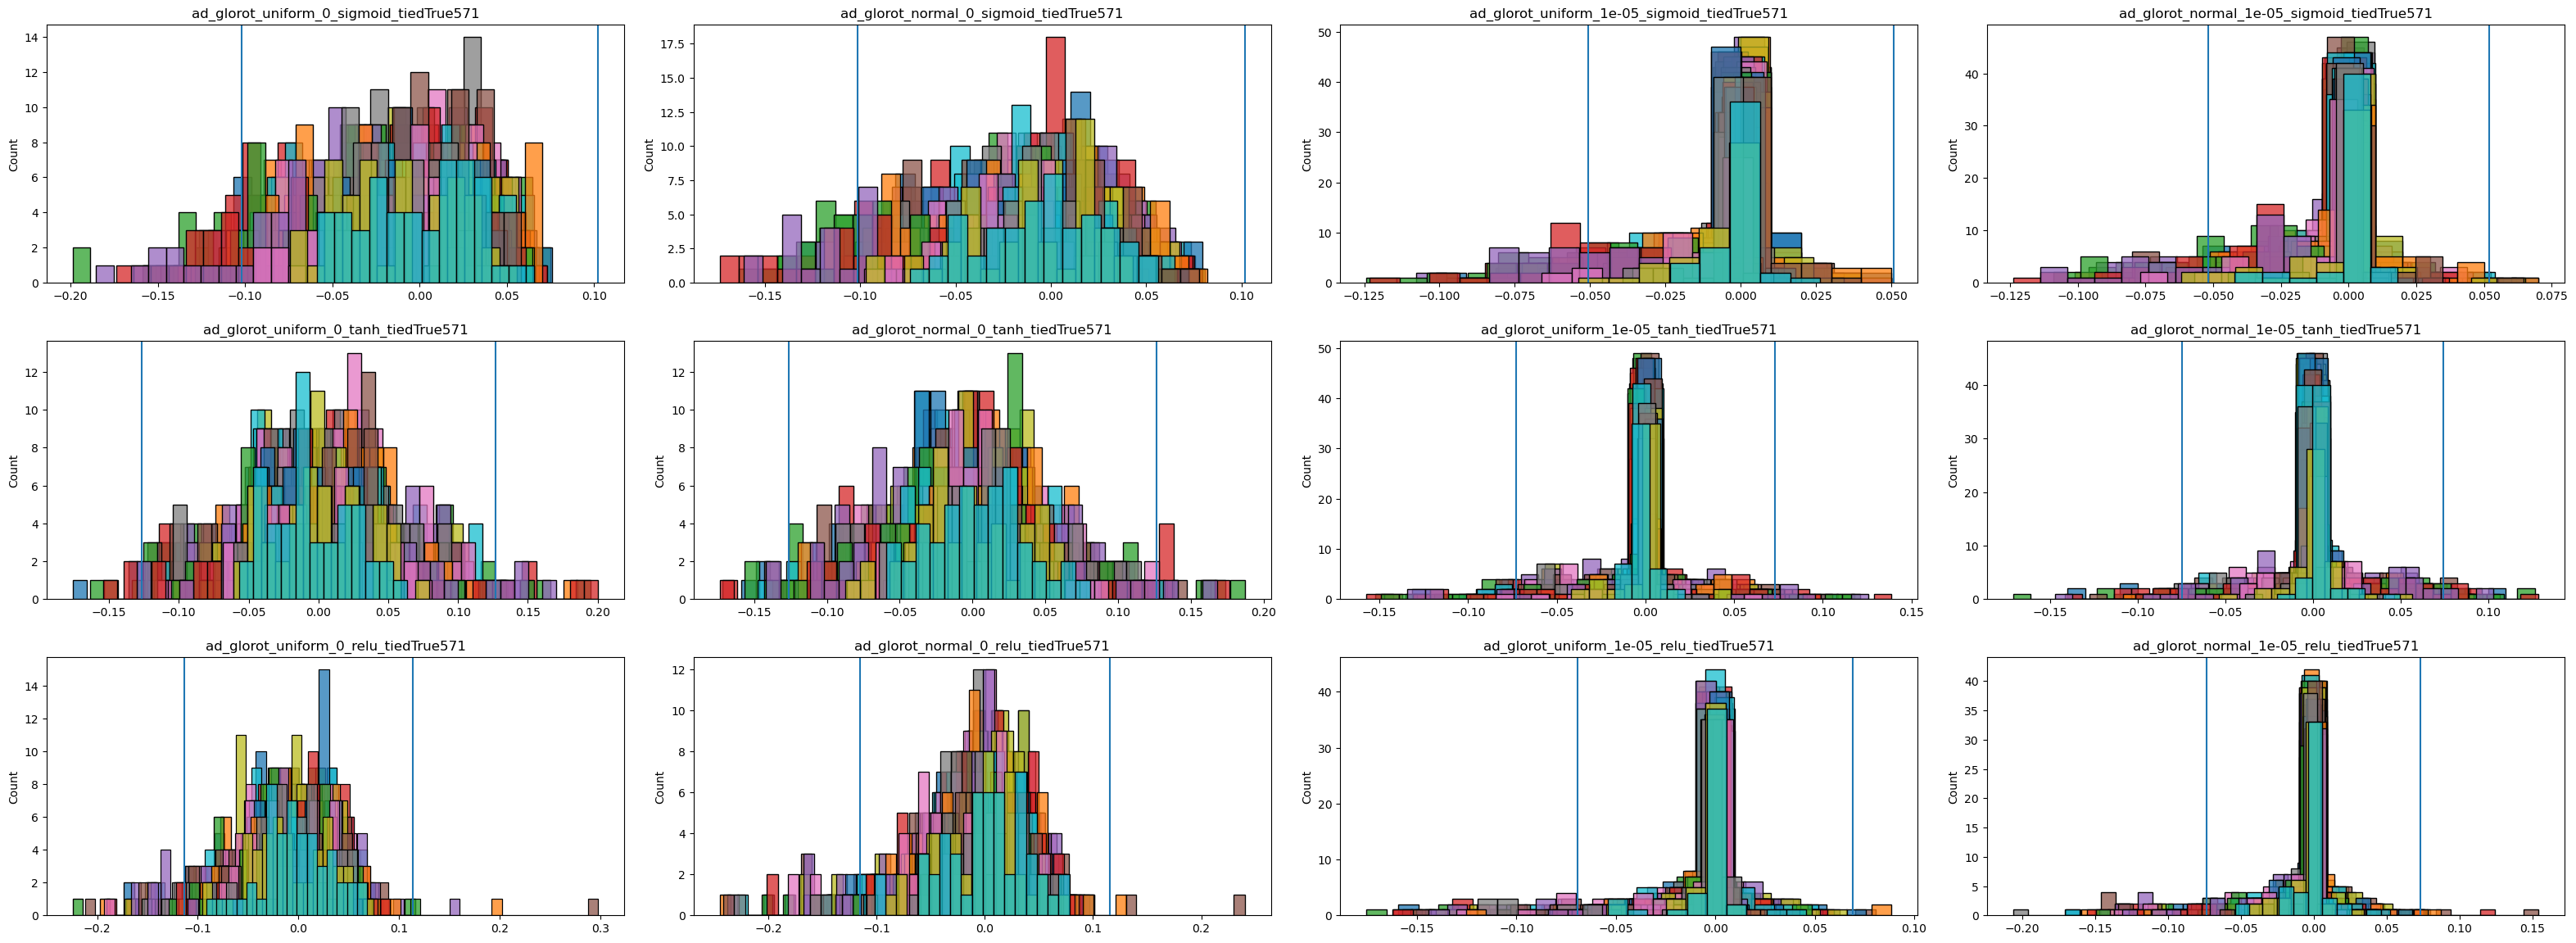

In [37]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


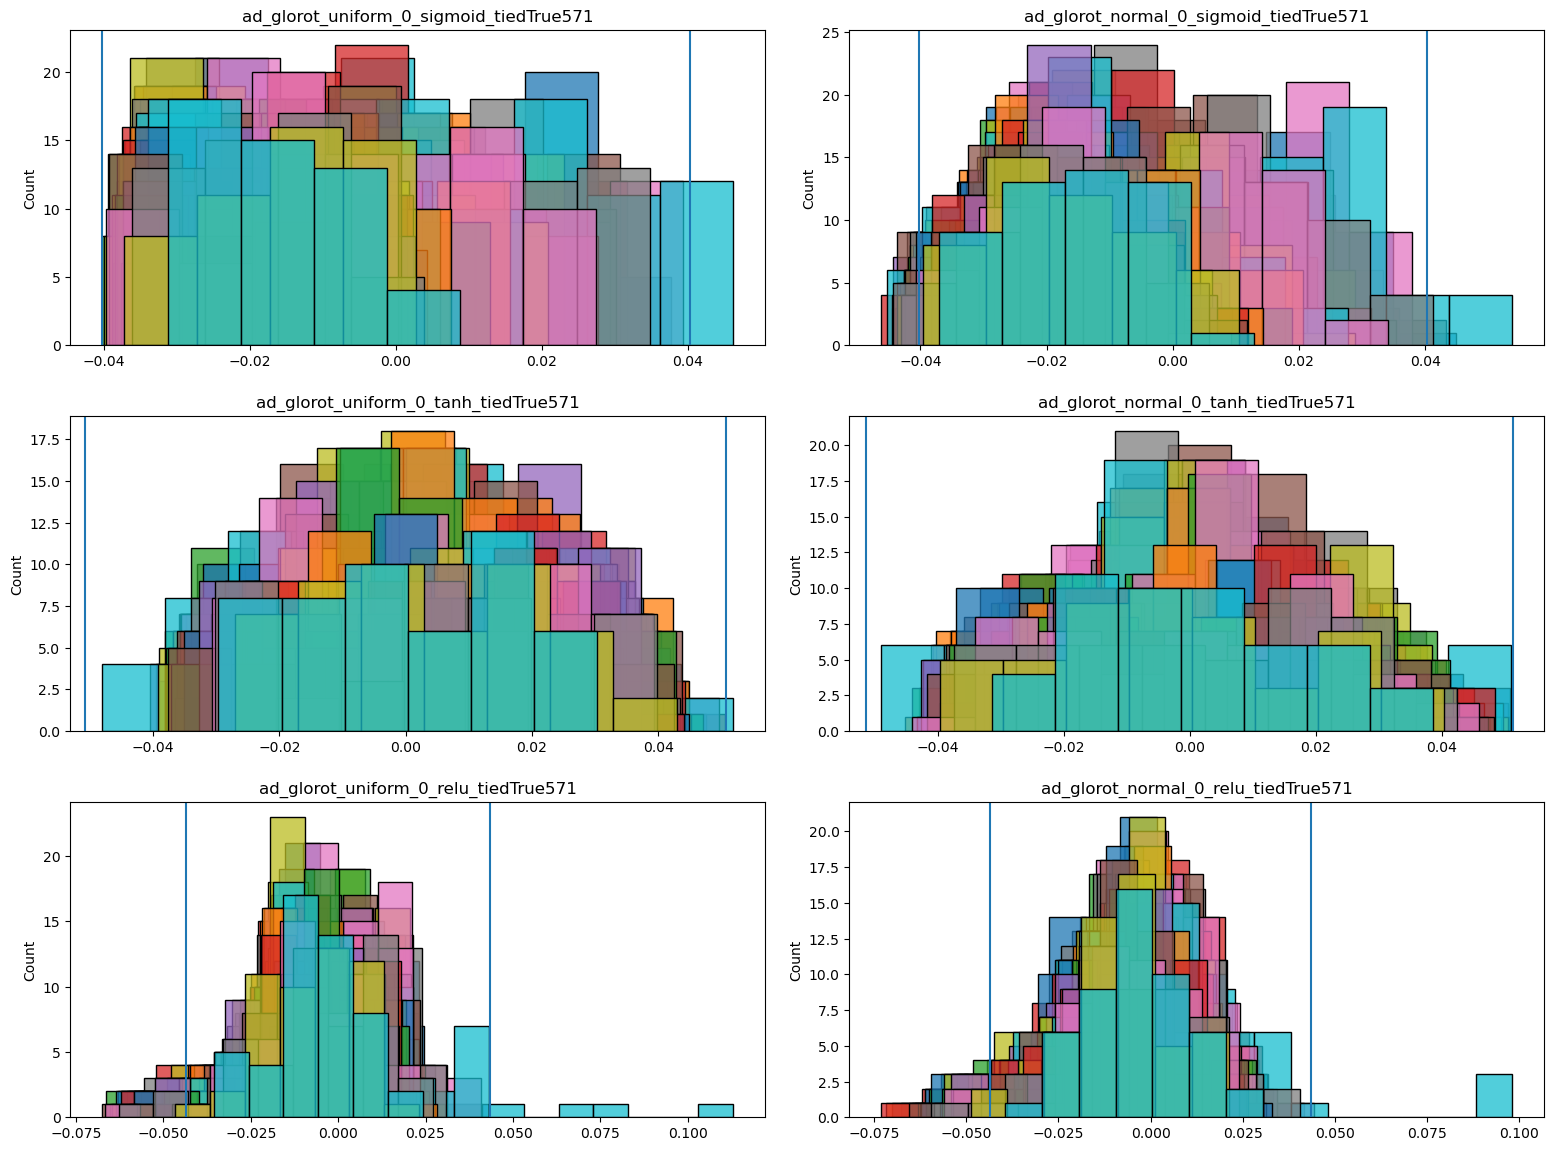

In [20]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_seq2CTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


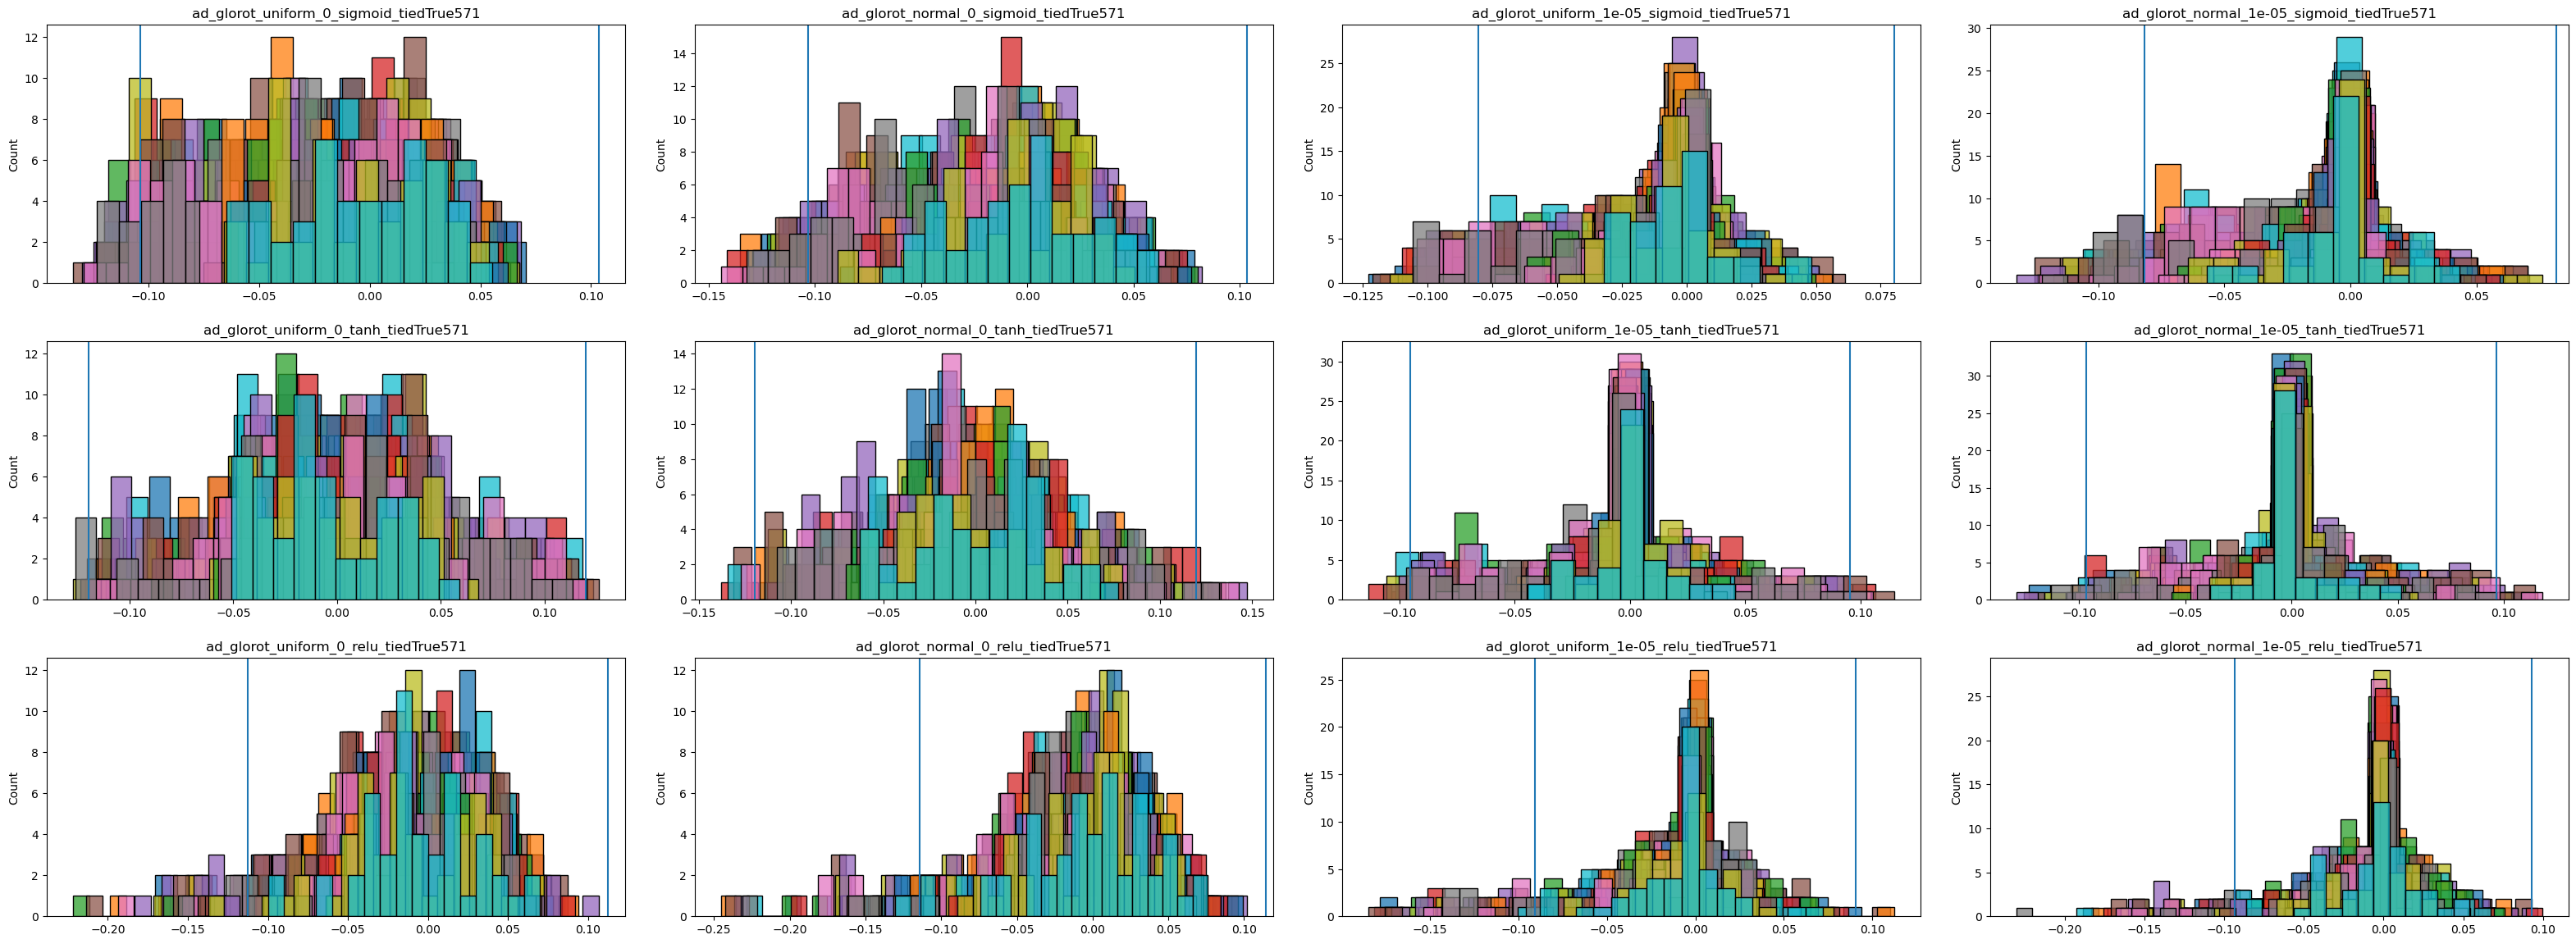

In [39]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_pre[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

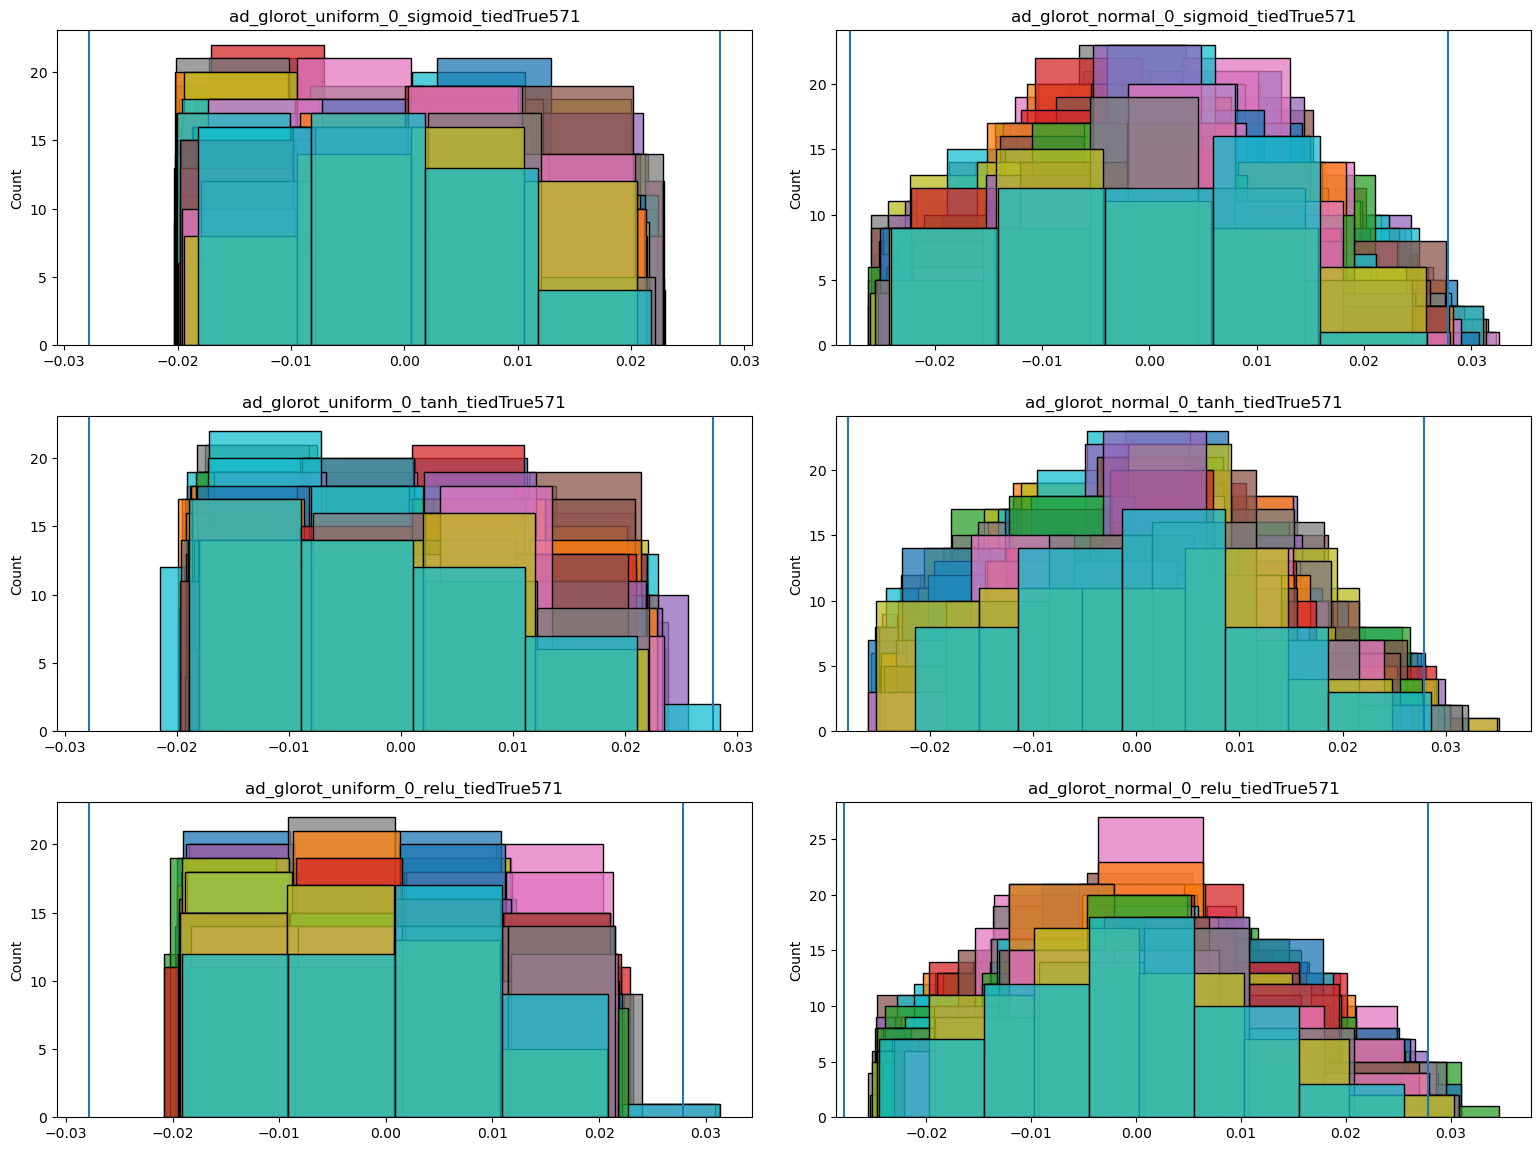

In [21]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                #print(name)
                model_temp = model_dict_preCTRL[name]
                for node in range(0,100):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        binwidth = 0.01, 
                        #stat="density",
                        kde=False
                        #rug=False
                                )
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1

In [41]:
model_temp = model_dict_seq2
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_seq2[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq2[m].set_kegg('../node_interpretation/sepanDB1282_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done') 

model_temp = model_dict_seq2CTRL
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_seq2CTRL[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq2CTRL[m].set_kegg('../node_interpretation/sepanDB1282_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done') 


model_temp = model_dict_pre
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_pre[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_pre[m].set_kegg('../node_interpretation/sepanDB1282_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done')


model_temp = model_dict_preCTRL
#del model_temp['tf_adage']
for m in model_temp:
    print(m)
    model_dict_preCTRL[m].set_hwg_cutoff(2.5)
    #model_dict_seq2[m].set_op('../node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_preCTRL[m].set_kegg('../node_interpretation/sepanDB1282_KEGG_format.txt') 
    #print('kegg done')
    #model_dict_seq2[m].set_go('../node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    #model_dict_seq2[m].set_reg('../node_interpretation/regulons_format.txt')
    #print('reg done')
print('dict done')

tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571
dict done
tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571
dict done
tf_adage
ad_gl

ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571


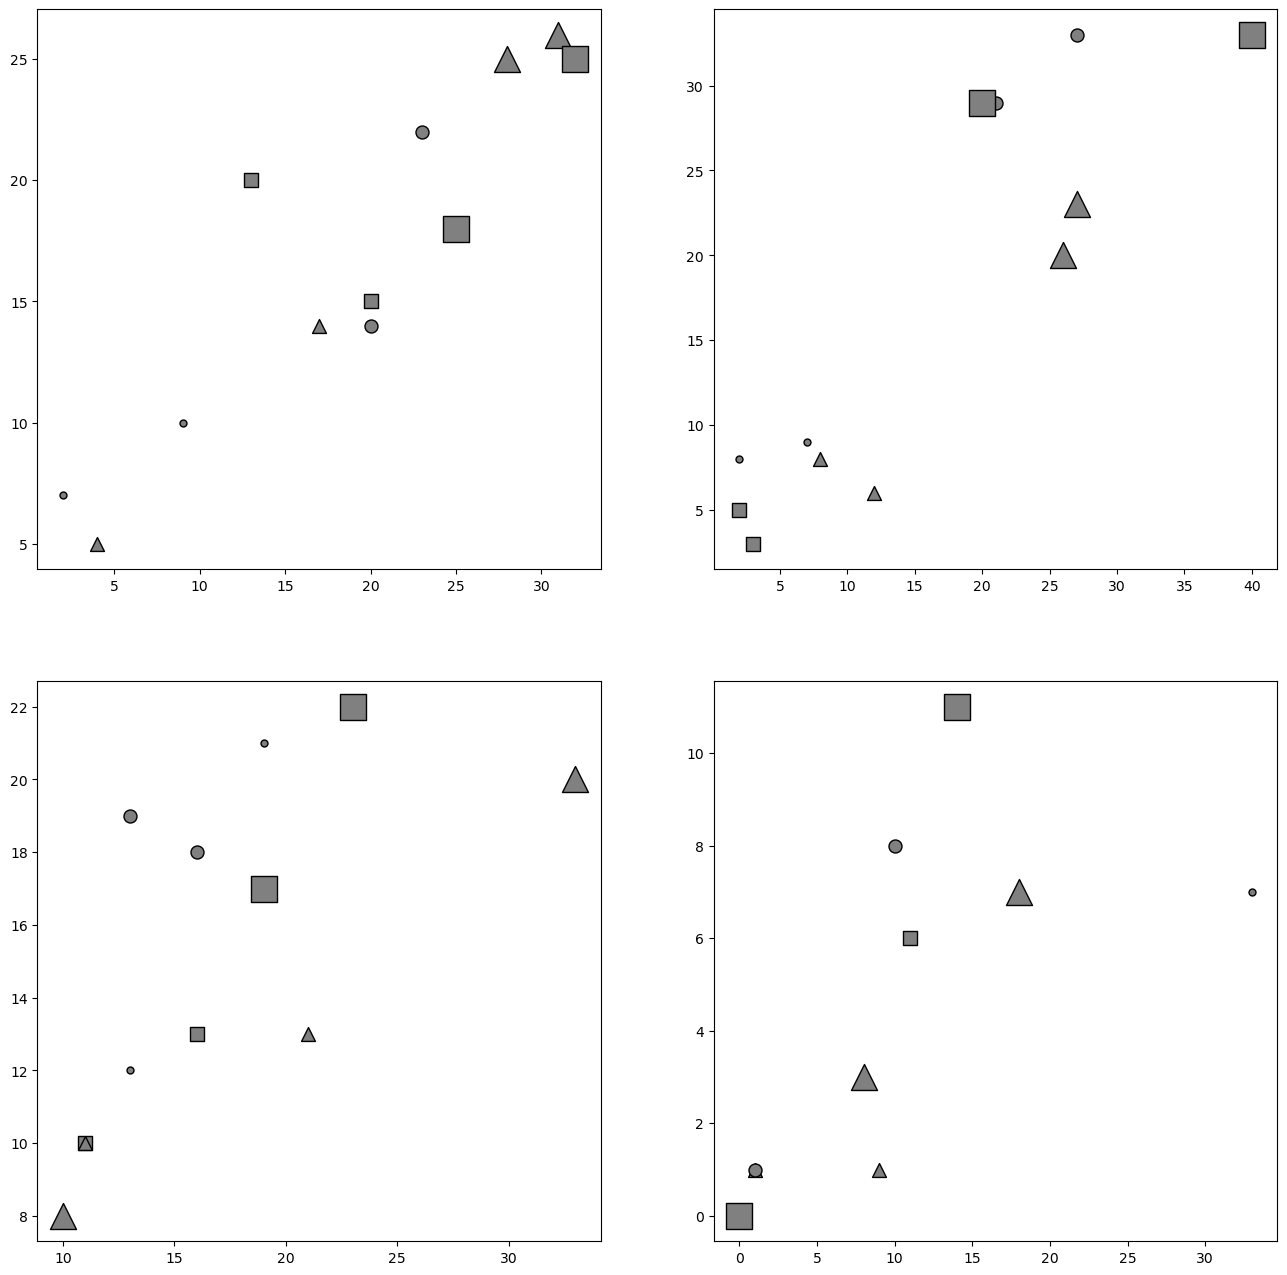

In [42]:


plimk=5
plimg=5
plimr=5
plimo=5
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
#x = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
#y = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
#ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

#x = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
#ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

#x = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
#ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'grey'

# edge color is tied or unties
ec = ['black','red','blue','green','purple']
eci=0

# shape is activation function
ms = ['.','s', '^','h']
mi=0

# size is L1 norm
s=50

for seed in range(1):
    for i in inits:
        s=100
    #print(i)
        for l in L1_norm:
            xi=0
            mi=0
        #print(l)
            for a in act_fun:
                m = ms[mi]
                eci=0
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                    print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_seq2CTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_pre[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_preCTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec[eci], s=s)
                    eci = eci+1
                mi = mi+1
            s=s+250
        c = 'grey'
                    


ad_glorot_uniform_0_sigmoid_tiedTrue571
ad_glorot_uniform_0_tanh_tiedTrue571
ad_glorot_uniform_0_relu_tiedTrue571
ad_glorot_uniform_1e-05_sigmoid_tiedTrue571
ad_glorot_uniform_1e-05_tanh_tiedTrue571
ad_glorot_uniform_1e-05_relu_tiedTrue571
ad_glorot_normal_0_sigmoid_tiedTrue571
ad_glorot_normal_0_tanh_tiedTrue571
ad_glorot_normal_0_relu_tiedTrue571
ad_glorot_normal_1e-05_sigmoid_tiedTrue571
ad_glorot_normal_1e-05_tanh_tiedTrue571
ad_glorot_normal_1e-05_relu_tiedTrue571


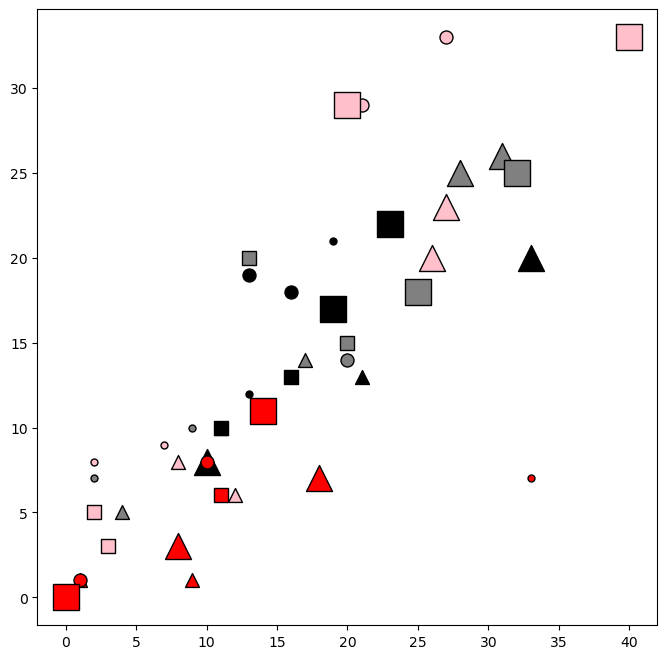

In [43]:

plimk=5
plimg=5
plimr=5
plimo=5
xd=1
yd=1
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
#x = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
#y = ((model_dict_seq2['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
#ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

#x = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
#ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

#x = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
#ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict_da_reps['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
#ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'grey'

# edge color is tied or untied
ec = ['black','red','blue','green','purple']
eci=0

# shape is activation function
ms = ['.','s', '^','h']
mi=0

# size is L1 norm
s=50

for seed in range(1):
    for i in inits:
        s=100
    #print(i)
        for l in L1_norm:
            xi=0
            mi=0
        #print(l)
            for a in act_fun:
                m = ms[mi]
                eci=0
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(571)
                    print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'grey', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_seq2CTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'pink', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_pre[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'black', marker = m, edgecolor = ec[eci], s=s)
                    
                    model_temp = model_dict_preCTRL[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax.scatter(x, y, c = 'red', marker = m, edgecolor = ec[eci], s=s)
                    eci = eci+1
                mi = mi+1
            s=s+250
        c = 'grey'
                    
